In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df_trainset = pd.read_csv("data/17_trainset_featurised.tsv", sep="\t")
df_trainset

,chr,strand,class,recount3_score,antisense_exon_start_ss,antisense_exon_end_ss,nearest_alt_start_ss_dist,nearest_alt_end_ss_dist,MaxEntScan_start_ss,MaxEntScan_end_ss,...,repeat_features_end_site_Type I Transposons/LINE,repeat_features_end_site_Centromere,repeat_features_end_site_Dust,repeat_features_end_site_Satellite repeats,repeat_features_end_site_Tandem repeats,repeat_features_end_site_LTRs,GC_content,CpG_island,intron_length,splice_site
0,chr1,+,1,59151,False,False,170,362,9.09,11.90,...,0,0,0,0,0,0,0.638961,False,385,GT:AG
1,chr1,+,1,61021,False,False,24,232,7.66,3.89,...,0,0,0,0,0,0,0.597194,False,499,GT:AG
2,chr1,+,1,21,False,False,24,246,7.15,7.61,...,0,0,0,0,0,0,0.595668,False,277,GT:AG
3,chr1,+,1,526,False,False,322,232,1.14,3.89,...,0,0,0,0,0,0,0.595238,False,168,GC:AG
4,chr1,+,1,0,False,False,322,232,-12.10,7.63,...,0,0,0,0,0,0,0.538462,False,78,GT:AG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484602,chrY,+,0,0,False,False,487,25,-19.72,3.66,...,0,0,0,0,0,0,0.628163,True,909,GT:AG
484603,chrY,-,0,31374,False,False,777,464,9.21,13.74,...,0,0,0,0,0,0,0.325301,False,415,GT:AG
484604,chrY,-,0,67,False,False,572,2963,8.56,2.38,...,0,0,0,0,0,0,0.383165,False,2970,GT:AG
484605,chrY,-,0,18958,False,False,1178,2,-12.64,5.91,...,0,0,0,0,0,0,0.384648,False,2358,GT:AG


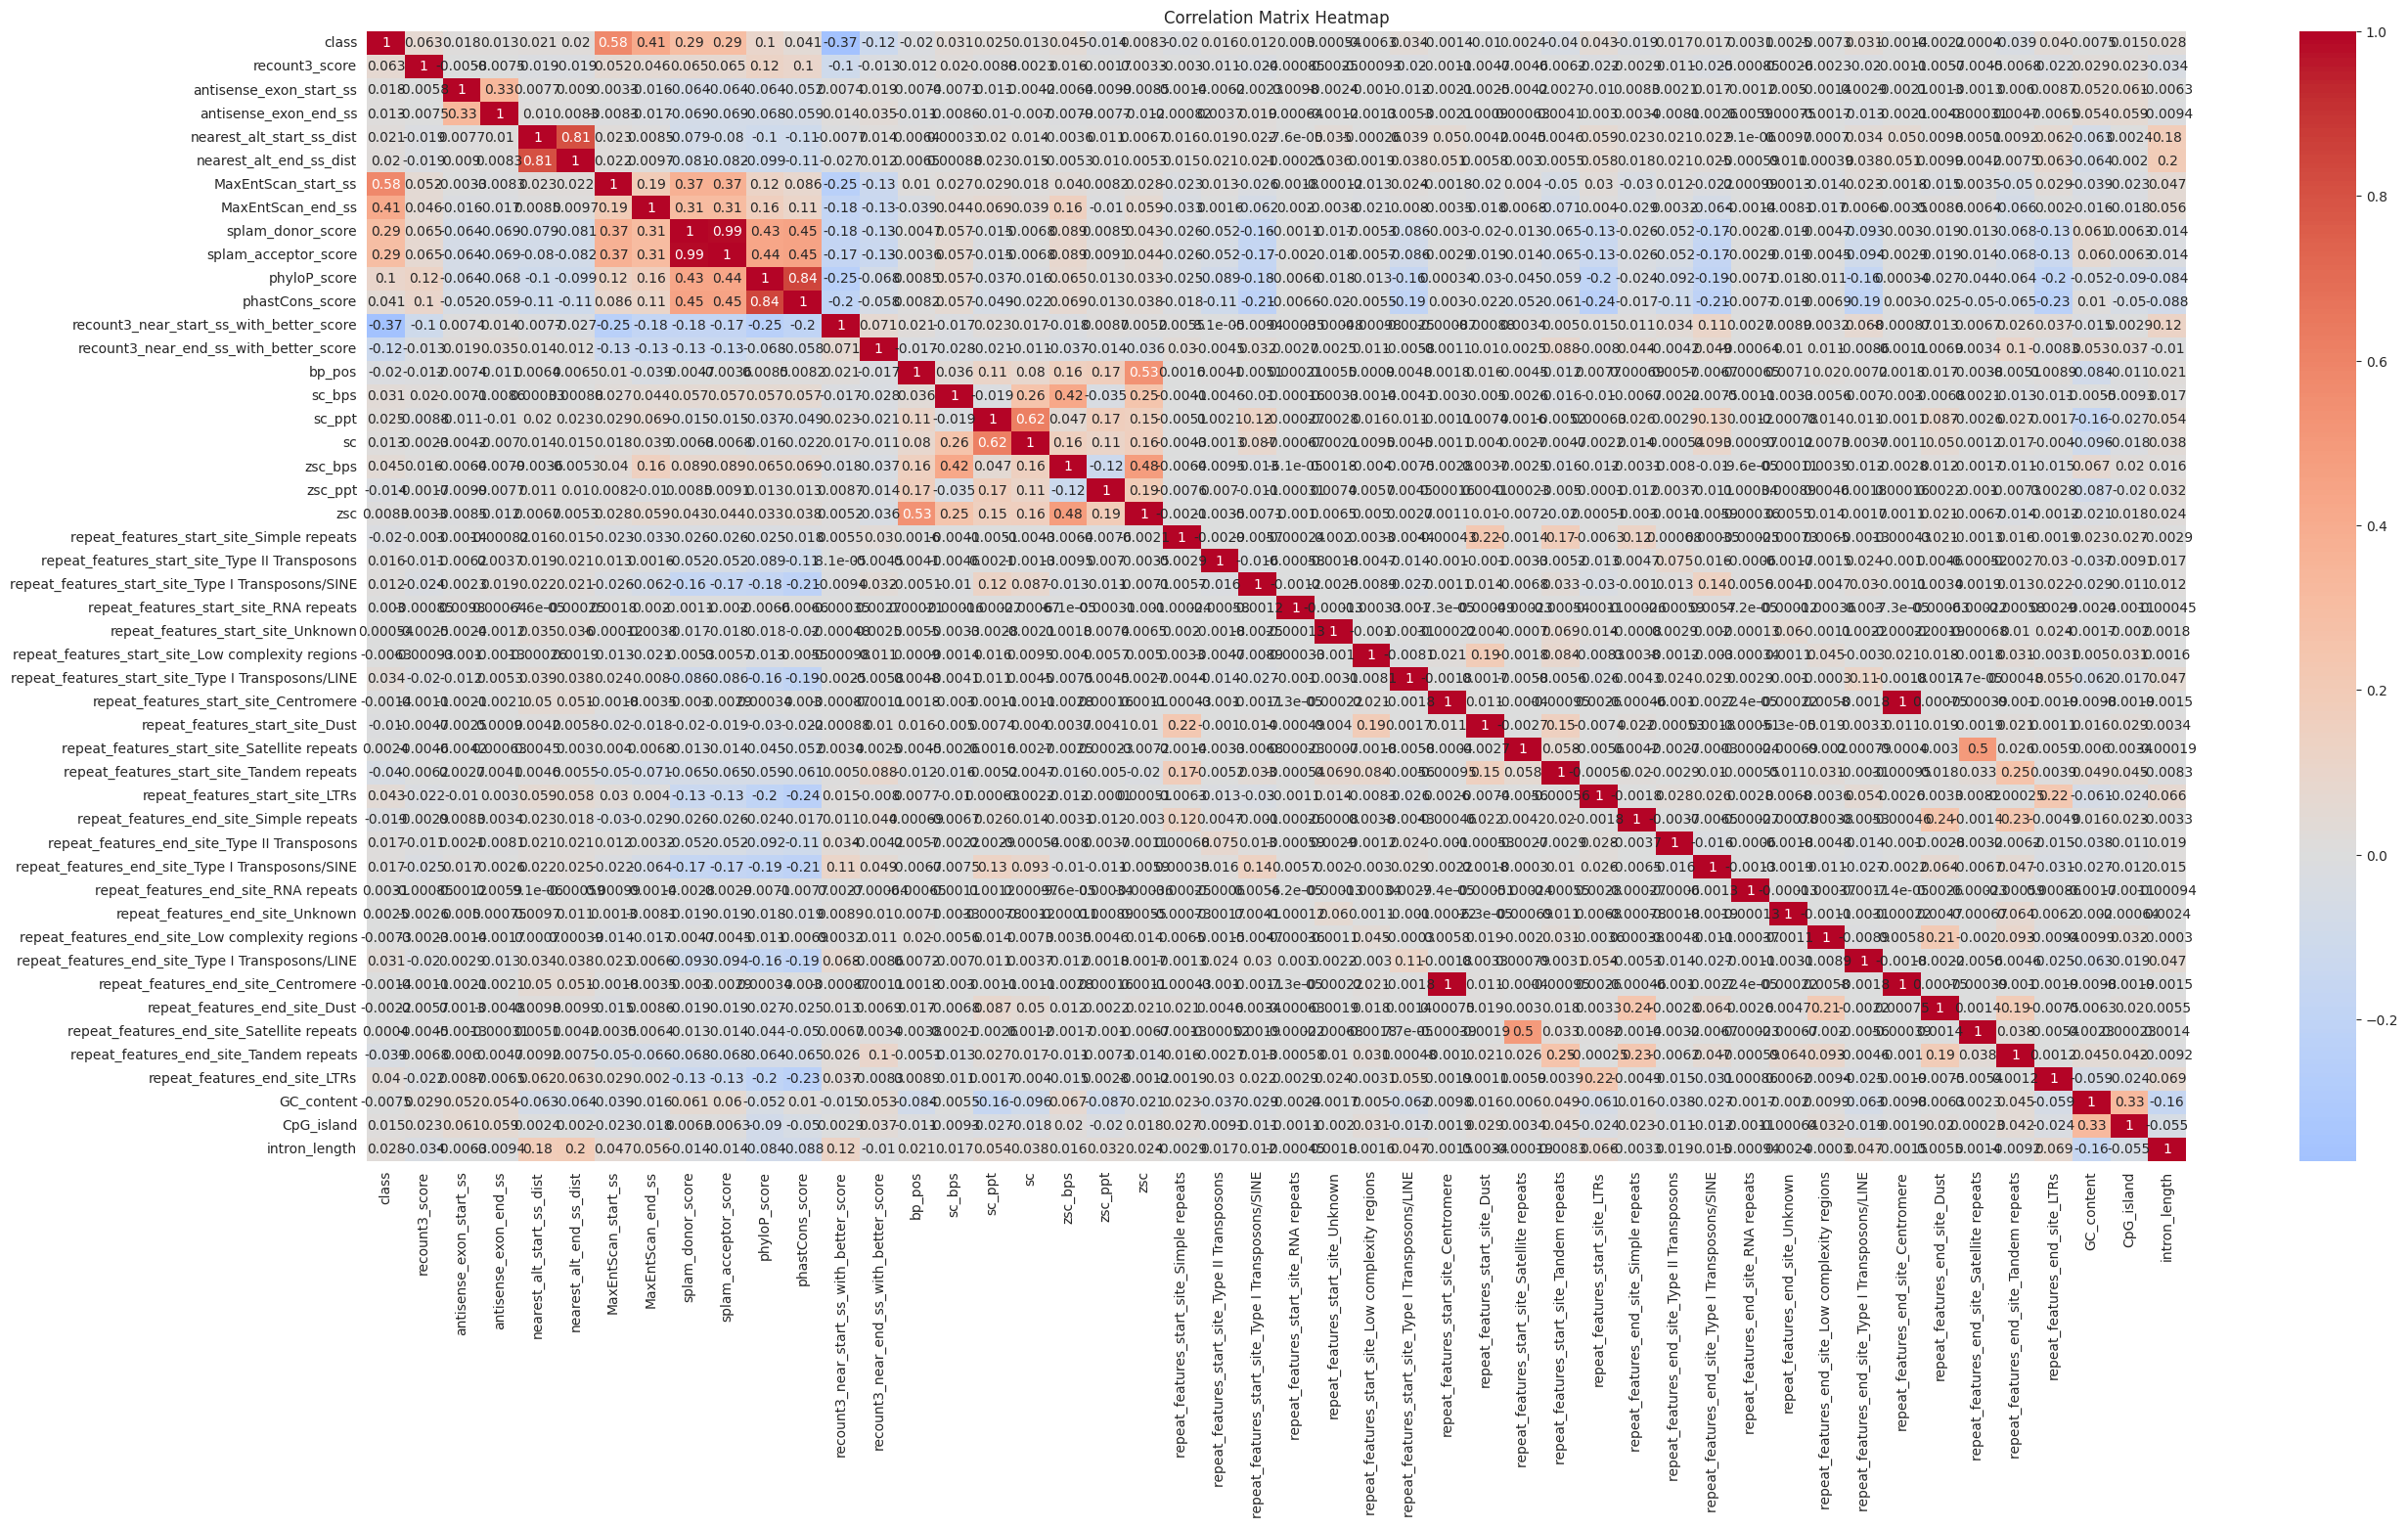

In [6]:
# Create a heatmap of the correlation matrix
plt.figure(figsize=(30, 15))
sns.heatmap(df_trainset.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [7]:
df_trainset["recount3_score"].describe()

count    4.846070e+05
mean     3.483765e+06
std      2.571834e+07
min      0.000000e+00
25%      1.260000e+03
50%      6.505800e+04
75%      1.914423e+06
max      5.819915e+09
Name: recount3_score, dtype: float64

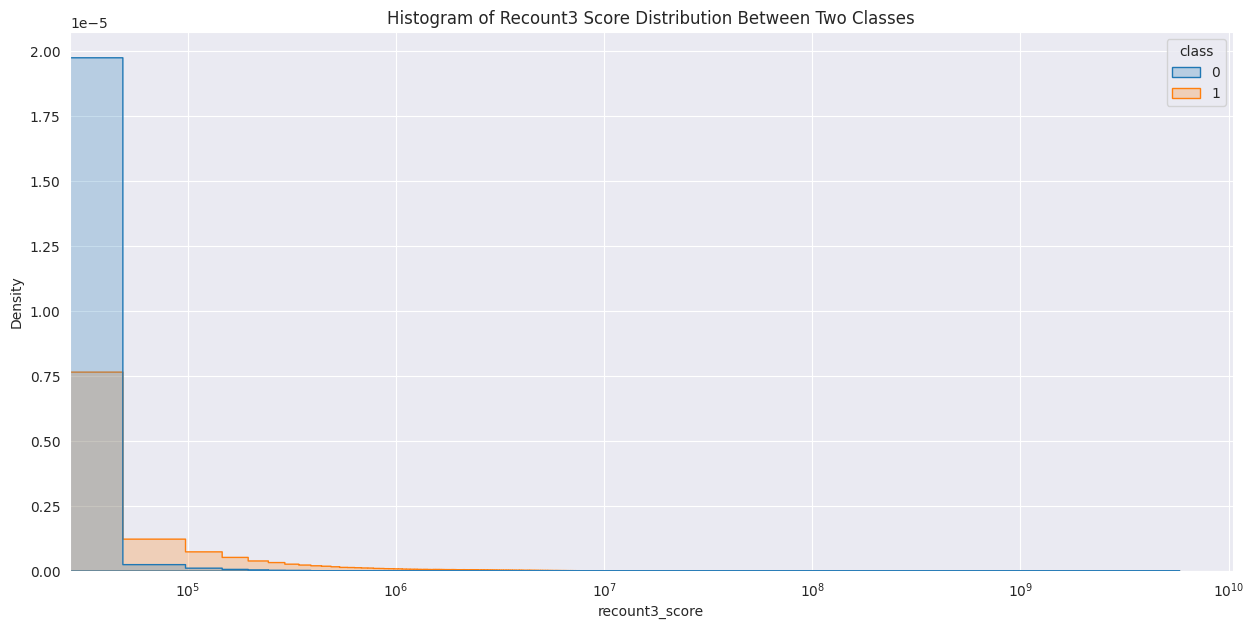

In [8]:
plt.figure(figsize=(15, 7))

sns.histplot(data=df_trainset, x='recount3_score', hue='class', element='step', stat='density', common_norm=False)
plt.xscale('log')
plt.title('Histogram of Recount3 Score Distribution Between Two Classes')
plt.show()

In [9]:
filtered_df_trainset = df_trainset[(df_trainset.splice_site == "GT:AG") | (df_trainset.splice_site == "GC:AG") | (df_trainset.splice_site == "AT:AC")]
filtered_df_trainset

,chr,strand,class,recount3_score,antisense_exon_start_ss,antisense_exon_end_ss,nearest_alt_start_ss_dist,nearest_alt_end_ss_dist,MaxEntScan_start_ss,MaxEntScan_end_ss,...,repeat_features_end_site_Type I Transposons/LINE,repeat_features_end_site_Centromere,repeat_features_end_site_Dust,repeat_features_end_site_Satellite repeats,repeat_features_end_site_Tandem repeats,repeat_features_end_site_LTRs,GC_content,CpG_island,intron_length,splice_site
0,chr1,+,1,59151,False,False,170,362,9.09,11.90,...,0,0,0,0,0,0,0.638961,False,385,GT:AG
1,chr1,+,1,61021,False,False,24,232,7.66,3.89,...,0,0,0,0,0,0,0.597194,False,499,GT:AG
2,chr1,+,1,21,False,False,24,246,7.15,7.61,...,0,0,0,0,0,0,0.595668,False,277,GT:AG
3,chr1,+,1,526,False,False,322,232,1.14,3.89,...,0,0,0,0,0,0,0.595238,False,168,GC:AG
4,chr1,+,1,0,False,False,322,232,-12.10,7.63,...,0,0,0,0,0,0,0.538462,False,78,GT:AG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484602,chrY,+,0,0,False,False,487,25,-19.72,3.66,...,0,0,0,0,0,0,0.628163,True,909,GT:AG
484603,chrY,-,0,31374,False,False,777,464,9.21,13.74,...,0,0,0,0,0,0,0.325301,False,415,GT:AG
484604,chrY,-,0,67,False,False,572,2963,8.56,2.38,...,0,0,0,0,0,0,0.383165,False,2970,GT:AG
484605,chrY,-,0,18958,False,False,1178,2,-12.64,5.91,...,0,0,0,0,0,0,0.384648,False,2358,GT:AG


In [10]:

total_count = {"0": len(filtered_df_trainset[filtered_df_trainset["class"] == 0]), "1": len(filtered_df_trainset[filtered_df_trainset["class"] == 1])}
count_df = filtered_df_trainset.groupby(["splice_site", 'class']).size().reset_index(name='counts')
count_df

,splice_site,class,counts
0,AT:AC,0,182
1,AT:AC,1,303
2,GC:AG,0,6232
3,GC:AG,1,7284
4,GT:AG,0,80347
5,GT:AG,1,390259


In [11]:
count_df.loc[count_df["class"] == 0, 'percentage'] = (count_df['counts'] / total_count["0"]) * 100
count_df.loc[count_df["class"] == 1, 'percentage'] = (count_df['counts'] / total_count["1"]) * 100

In [12]:
count_df

,splice_site,class,counts,percentage
0,AT:AC,0,182,0.209772
1,AT:AC,1,303,0.076160
2,GC:AG,0,6232,7.182951
3,GC:AG,1,7284,1.830859
4,GT:AG,0,80347,92.607277
5,GT:AG,1,390259,98.092981


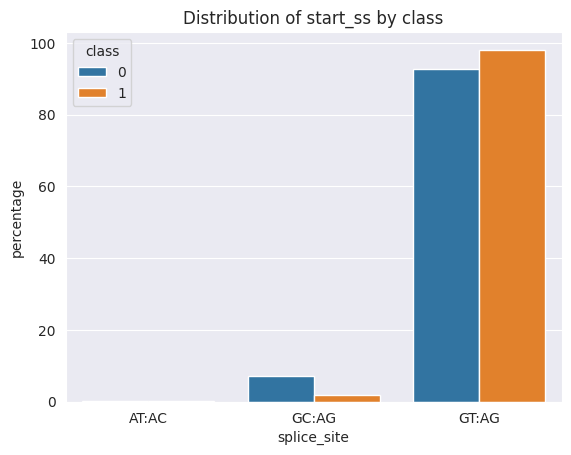

In [13]:
# Create bar charts for start_ss
sns.barplot(data=count_df, x='splice_site', y='percentage', hue='class')
plt.title('Distribution of splice-site by class')
plt.show()